In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-exam-score-dataset-analysis/student_exam_scores.csv


In [2]:
import numpy as np 
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/kaggle/input/student-exam-score-dataset-analysis/student_exam_scores.csv")

In [4]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [6]:
df.drop("student_id",axis=1,inplace=True)

In [7]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


<Axes: xlabel='hours_studied'>

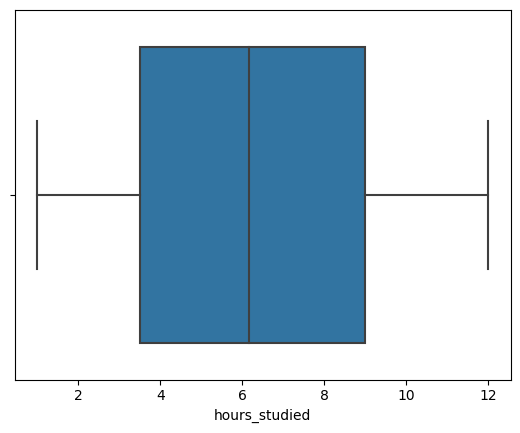

In [8]:
sns.boxplot(x=df["hours_studied"])

<Axes: xlabel='hours_studied', ylabel='exam_score'>

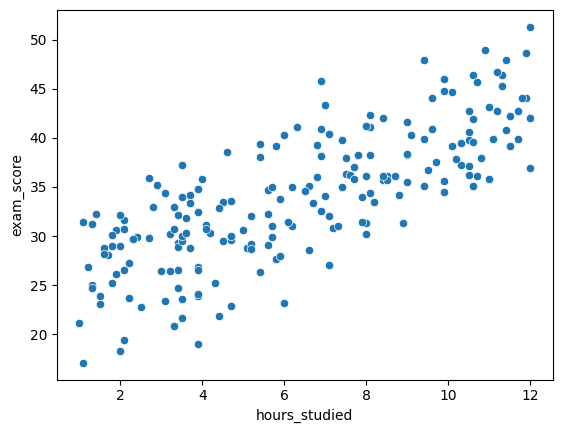

In [9]:
sns.scatterplot(x=df["hours_studied"],y=df["exam_score"])

<Axes: >

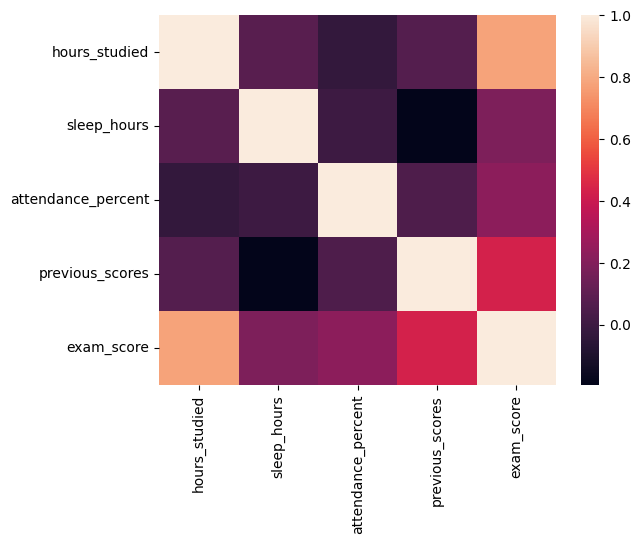

In [10]:
sns.heatmap(df.corr())

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [12]:
x,y=df.drop("exam_score",axis=1),df["exam_score"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)




LinearRegression()

In [15]:
y_pred=model.predict(x_test)

print("mse",mean_squared_error(y_test,y_pred))

print("mae",mean_absolute_error(y_test,y_pred))

mse 7.3533832345459045
mae 2.2629298898354655


In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [18]:
model2=LinearRegression()
model2.fit(x_train,y_train)


LinearRegression()

In [19]:
y_pred=model2.predict(x_test)

print("mse",mean_squared_error(y_test,y_pred))

print("mae",mean_absolute_error(y_test,y_pred))

mse 7.35338323454594
mae 2.2629298898354766
